In [61]:

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Machine Learning Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dataset
from sklearn.datasets import load_iris

# Model Evaluation and Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# Other
import datetime as dt
import re
from sklearn.model_selection import ParameterGrid

In [62]:
## ↓ Import Gambling Dataset ↓
df = pd.read_csv('gambling.csv')

In [63]:
# view information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 96 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerId                            1801 non-null   int64  
 1   RG_case                               1801 non-null   int64  
 2   Missing_Daily_Transactions            1801 non-null   int64  
 3   CountryName                           1801 non-null   object 
 4   LanguageName                          1801 non-null   object 
 5   Gender                                1801 non-null   object 
 6   YearofBirth                           1801 non-null   int64  
 7   age_at_registration                   1801 non-null   int64  
 8   sum_stakes_fixedodds                  1801 non-null   int64  
 9   sum_bets_fixedodds                    1801 non-null   int64  
 10  bettingdays_fixedodds                 1801 non-null   int64  
 11  duration_fixedodd

In [64]:
# view dimensions of dataset
df.shape

(1801, 96)

In [65]:
# let's preview the dataset

df.head()

,customerId,RG_case,Missing_Daily_Transactions,CountryName,LanguageName,Gender,YearofBirth,age_at_registration,sum_stakes_fixedodds,sum_bets_fixedodds,...,sum_stakes_casino_sqrt_zeros,sum_bets_casino_sqrt_zeros,bettingdays_casino_sqrt_zeros,duration_casino_sqrt_zeros,frequency_casino_sqrt_zeros,bets_per_day_casino_sqrt_zeros,euros_per_bet_casino_sqrt_zeros,net_loss_casino_sqrt_zeros,churn,DaysLastOrder
0,1237924,0,0,Denmark,English,M,1967,37,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,724
1,378707,1,0,Austria,German,M,1962,39,929,511,...,155.0,260.0,10.0,52.0,0.0,25.0,1.0,192.0,True,711
2,1277143,0,0,Germany,German,F,1970,34,75,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,703
3,1006572,1,0,Austria,German,M,1979,24,40194,282,...,639.0,72.0,8.0,44.0,0.0,9.0,9.0,230.0,True,702
4,1361415,0,0,Germany,German,F,1979,25,21,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,700


In [66]:
# view the column names of the dataframe

col_names = df.columns

col_names
     

Index(['customerId', 'RG_case', 'Missing_Daily_Transactions', 'CountryName',
       'LanguageName', 'Gender', 'YearofBirth', 'age_at_registration',
       'sum_stakes_fixedodds', 'sum_bets_fixedodds', 'bettingdays_fixedodds',
       'duration_fixedodds', 'frequency_fixedodds', 'bets_per_day_fixedodds',
       'euros_per_bet_fixedodds', 'net_loss_fixedodds',
       'percent_lost_fixedodds', 'sum_stakes_liveaction',
       'sum_bets_liveaction', 'bettingdays_liveaction', 'duration_liveaction',
       'frequency_liveaction', 'bets_per_day_liveaction',
       'euros_per_bet_liveaction', 'net_loss_liveaction',
       'percent_lost_liveaction', 'sum_stakes_casino', 'sum_bets_casino',
       'bettingdays_casino', 'duration_casino', 'frequency_casino',
       'bets_per_day_casino', 'euros_per_bet_casino', 'net_loss_casino',
       'percent_lost_casino', 'net_loss_fixedodds_nonzero',
       'percent_lost_fixedodds_nonzero', 'net_loss_liveaction_nonzero',
       'percent_lost_liveaction_nonzero'

In [67]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [68]:
# view column names again

df.columns

Index(['customerId', 'RG_case', 'Missing_Daily_Transactions', 'CountryName',
       'LanguageName', 'Gender', 'YearofBirth', 'age_at_registration',
       'sum_stakes_fixedodds', 'sum_bets_fixedodds', 'bettingdays_fixedodds',
       'duration_fixedodds', 'frequency_fixedodds', 'bets_per_day_fixedodds',
       'euros_per_bet_fixedodds', 'net_loss_fixedodds',
       'percent_lost_fixedodds', 'sum_stakes_liveaction',
       'sum_bets_liveaction', 'bettingdays_liveaction', 'duration_liveaction',
       'frequency_liveaction', 'bets_per_day_liveaction',
       'euros_per_bet_liveaction', 'net_loss_liveaction',
       'percent_lost_liveaction', 'sum_stakes_casino', 'sum_bets_casino',
       'bettingdays_casino', 'duration_casino', 'frequency_casino',
       'bets_per_day_casino', 'euros_per_bet_casino', 'net_loss_casino',
       'percent_lost_casino', 'net_loss_fixedodds_nonzero',
       'percent_lost_fixedodds_nonzero', 'net_loss_liveaction_nonzero',
       'percent_lost_liveaction_nonzero'

In [69]:
# check for missing values in variables
df.isnull().sum()

customerId                            0
RG_case                               0
Missing_Daily_Transactions            0
CountryName                           0
LanguageName                          0
                                   ... 
bets_per_day_casino_sqrt_zeros     1117
euros_per_bet_casino_sqrt_zeros    1117
net_loss_casino_sqrt_zeros         1117
churn                                 0
DaysLastOrder                         0
Length: 96, dtype: int64

In [70]:
# Replacing null or empty values with 0 in all columns
df.fillna(0.0, inplace=True)

In [71]:
# iterate over the columns of the DataFrame
for col in df.columns:
    # check if the column is of type "int"
    if df[col].dtype == int:
        # convert the column to "float"
        df[col] = df[col].astype(float)

In [72]:
# view summary statistics in numerical variables
round(df.describe(),2)

,customerId,RG_case,Missing_Daily_Transactions,YearofBirth,age_at_registration,sum_stakes_fixedodds,sum_bets_fixedodds,bettingdays_fixedodds,duration_fixedodds,frequency_fixedodds,...,percent_lost_liveaction_sqrt_zeros,sum_stakes_casino_sqrt_zeros,sum_bets_casino_sqrt_zeros,bettingdays_casino_sqrt_zeros,duration_casino_sqrt_zeros,frequency_casino_sqrt_zeros,bets_per_day_casino_sqrt_zeros,euros_per_bet_casino_sqrt_zeros,net_loss_casino_sqrt_zeros,DaysLastOrder
count,1801.00,1801.00,1801.0,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00,...,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00,1801.00
mean,2216790.95,0.53,0.0,1975.49,29.06,7569.13,985.79,131.50,1068.71,0.11,...,1.14,48.17,23.06,1.93,8.22,0.11,3.54,1.06,74.31,113.87
std,1104843.36,0.50,0.0,9.51,9.47,26252.69,3439.86,210.99,751.73,0.31,...,1.45,132.66,65.70,4.07,14.12,0.31,6.40,2.30,96.08,164.27
min,31965.00,0.00,0.0,1920.00,16.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-30.00
25%,1333978.00,0.00,0.0,1971.00,22.00,165.00,34.00,14.00,376.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-21.00
50%,2063492.00,1.00,0.0,1978.00,27.00,855.00,151.00,55.00,1123.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00
75%,3119956.00,1.00,0.0,1983.00,34.00,4987.00,582.00,159.00,1600.00,0.00,...,3.00,19.00,12.00,2.00,13.00,0.00,5.00,1.00,189.00,206.00
max,4413987.00,1.00,0.0,1988.00,84.00,669483.00,55462.00,2155.00,3759.00,1.00,...,3.00,936.00,769.00,31.00,56.00,1.00,49.00,41.00,459.00,724.00


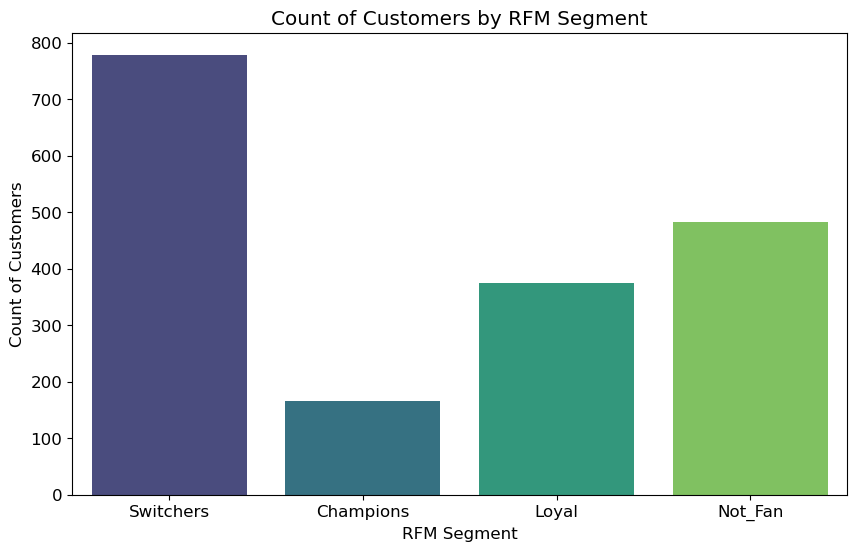

In [73]:
# Sample data creation for the purpose of this example
df = df = pd.read_csv('gambling.csv')

# Creating the RFM DataFrame
df_RFM = df[['customerId', 'sum_stakes_fixedodds', 'sum_stakes_liveaction', 'sum_bets_casino', 'sum_bets_liveaction', 'DaysLastOrder']].copy()
df_RFM['Recency'] = df_RFM['DaysLastOrder']
df_RFM['MonetaryValue'] = df_RFM['sum_stakes_fixedodds'] + df_RFM['sum_stakes_liveaction']
df_RFM['Frequency'] = df_RFM['sum_bets_liveaction'] + df_RFM['sum_bets_casino']

# Calculate quartiles for each RFM metric
quartiles = df_RFM.quantile(q=[0.20, 0.40, 0.60, 0.80])

# Define function to assign quartile scores
def assign_quartile_score(value, quartile):
    if value <= quartile[0.20]:
        return 1
    elif value <= quartile[0.40]:
        return 2
    elif value <= quartile[0.60]:
        return 3
    elif value <= quartile[0.80]:
        return 4
    else:
        return 5

# Assign quartile scores to each RFM metric
df_RFM['R'] = df_RFM['Recency'].apply(assign_quartile_score, args=(quartiles['Recency'],))
df_RFM['F'] = df_RFM['Frequency'].apply(assign_quartile_score, args=(quartiles['Frequency'],))
df_RFM['M'] = df_RFM['MonetaryValue'].apply(assign_quartile_score, args=(quartiles['MonetaryValue'],))

# Concatenate RFM scores to create a combined RFM score
df_RFM['RFM_score'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)

# Define dictionary to map RFM scores to segments using regular expressions
rfm_segment_dict = {
    'Not_Fan': [r'[1][1-5]', r'[2][1-2]'],
    'Switchers': [r'[2][3-5]', r'[3][1-2]', r'[4-5][1-2]'],
    'Loyal': [r'[3][3-5]', r'[4-5][3]'],
    'Champions': [r'[4-5][4-5]']
}

# Function to get segment for a given RFM score
def get_segment(rfm_score):
    segment = None
    for seg, patterns in rfm_segment_dict.items():
        for pattern in patterns:
            if re.match(pattern, rfm_score):
                segment = seg
                break
        if segment is not None:
            break
    return segment

# Add RFM segment column to the dataframe
df_RFM['RFM_segment'] = df_RFM['RFM_score'].apply(get_segment)

# Merge the RFM data back into the original dataframe
df = pd.merge(df, df_RFM[['customerId', 'Recency', 'Frequency', 'MonetaryValue', 'RFM_segment']], how='left', on='customerId')

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_segment', data=df, palette='viridis')
plt.title('Count of Customers by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Count of Customers')

# Show plot
plt.show()

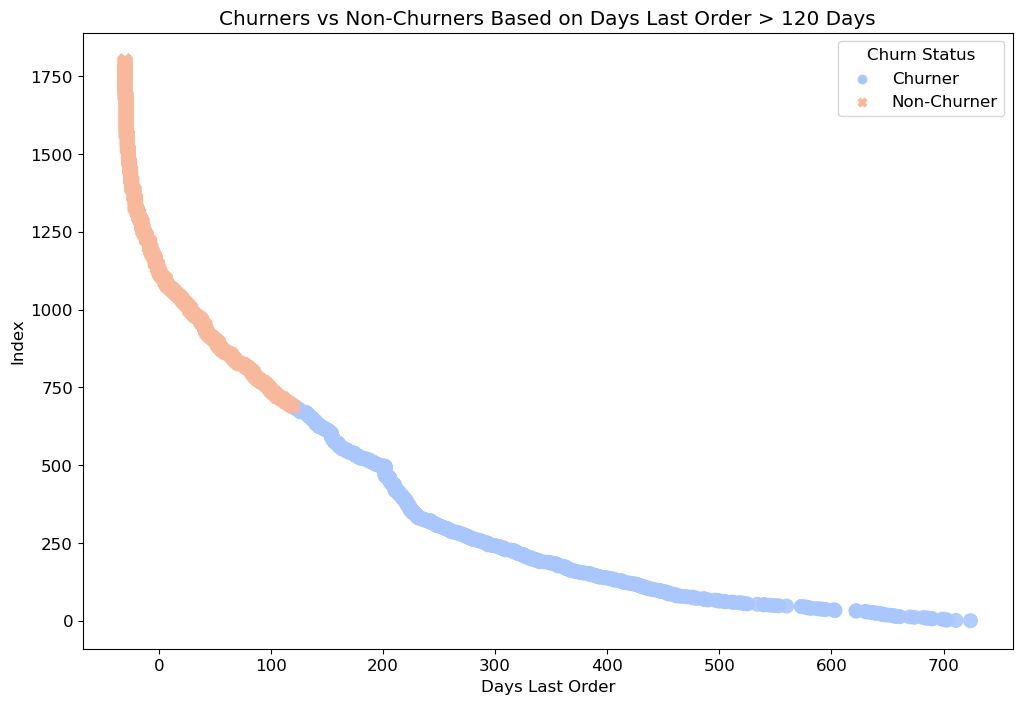

In [74]:
# Sample data creation for the purpose of this example
df = df = pd.read_csv('gambling.csv')

# Classify churners and non-churners based on DaysLastOrder
df['Churner'] = df['DaysLastOrder'] > 120
df['Churner'] = df['Churner'].map({True: 'Churner', False: 'Non-Churner'})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DaysLastOrder', y=df.index, hue='Churner', style='Churner', 
                data=df, palette='coolwarm', s=100, alpha=0.9, edgecolor=None)

# Labeling the plot
plt.title('Churners vs Non-Churners Based on Days Last Order > 120 Days')
plt.xlabel('Days Last Order')
plt.ylabel('Index')  # Using the index for the y-axis
plt.legend(title='Churn Status')

# Show plot
plt.show()

  Column Type  Count
0     float64     59
1       int64     33
2      object      4
3        bool      1


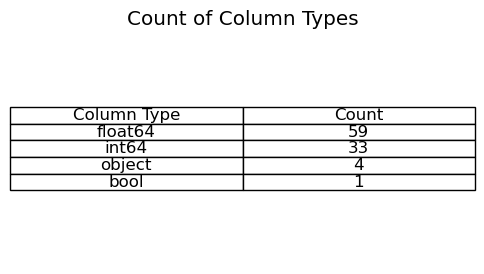

In [75]:
# Get the data types of each column
column_types = df.dtypes

# Count the occurrences of each data type
column_type_counts = column_types.value_counts().reset_index()
column_type_counts.columns = ['Column Type', 'Count']

# Print the counts table
print(column_type_counts)

# Plotting the table
plt.figure(figsize=(6, 3))
plt.table(cellText=column_type_counts.values, colLabels=column_type_counts.columns, cellLoc='center', loc='center')
plt.axis('off')
plt.title('Count of Column Types')
plt.show()

In [76]:
churn_counts = df['churn'].value_counts()

print(churn_counts)

churn
True     990
False    811
Name: count, dtype: int64


In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Suppose df is your DataFrame containing the data

# Delete invalid columns
df = df.drop('customerId', axis=1)
df = df.drop('DaysLastOrder', axis=1)

# Identify data types
data_types = df.dtypes
print("\nData Types:")
print(data_types)

# Perform data cleaning and preprocessing
for column in df.columns:
    if df[column].dtype == 'object':  # Handle categorical columns
        # Convert string columns to lowercase
        df[column] = df[column].str.lower()

        # Replace missing values with the most frequent value
        mode = df[column].mode().iloc[0]
        df[column].fillna(mode, inplace=True)

# Use get_dummies to perform one-hot encoding for all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

for column in df.columns:
    if df[column].dtype in ['float64', 'float32', 'int64', 'int32']:  # Handle numerical columns
        # Replace missing values with the mean
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)

        # Normalize numerical columns using Min-Max scaling
        scaler = MinMaxScaler()
        df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    else:
        # Handle other data types as needed
        pass

# Set the target variable as 'Churn'
y = df['churn']
X = df.drop('churn', axis=1)

# Display the cleaned and preprocessed dataset
print("\nCleaned and Preprocessed Dataset:")
print(X.head())
print("\nTarget variable:")
print(y.head())

     



Data Types:
RG_case                              int64
Missing_Daily_Transactions           int64
CountryName                         object
LanguageName                        object
Gender                              object
                                    ...   
bets_per_day_casino_sqrt_zeros     float64
euros_per_bet_casino_sqrt_zeros    float64
net_loss_casino_sqrt_zeros         float64
churn                                 bool
Churner                             object
Length: 95, dtype: object

Cleaned and Preprocessed Dataset:
   RG_case  Missing_Daily_Transactions  YearofBirth  age_at_registration  \
0      0.0                         0.0     0.691176             0.308824   
1      1.0                         0.0     0.617647             0.338235   
2      0.0                         0.0     0.735294             0.264706   
3      1.0                         0.0     0.867647             0.117647   
4      0.0                         0.0     0.867647             0.132353 

In [78]:
# Display the loaded dataset
print("Loaded Dataset:")
print(df.head())

# Identify data types
data_types = df.dtypes
print("\nData Types:")
print(data_types)

# Perform data cleaning and preprocessing
for column in df.columns:
    if df[column].dtype == 'object':  # Handle categorical columns
        # Convert string columns to lowercase
        df[column] = df[column].str.lower()

        # Replace missing values with the most frequent value
        mode = df[column].mode().iloc[0]
        df[column].fillna(mode, inplace=True)

        # Check if the column is still a categorical variable
        if df[column].dtype == 'object':
            # One-hot encode categorical columns using OneHotEncoder
            encoder = OneHotEncoder()
            encoded_columns = pd.DataFrame(encoder.fit_transform(df[[column]]).toarray(),
                                           columns=[f"{column}_{val}" for val in encoder.categories_[0]])
            df = pd.concat([df, encoded_columns], axis=1)
            df.drop(column, axis=1, inplace=True)

    elif df[column].dtype in ['float64', 'float32', 'int64', 'int32']:  # Handle numerical columns
        # Replace missing values with the mean
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)

        # Normalize numerical columns using Min-Max scaling
        scaler = MinMaxScaler()
        df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
    else:
        # Handle other data types as needed
        pass

# Set the target variable as 'Churn'
y = df['churn']
X = df.drop('churn', axis=1)

# Display the cleaned and preprocessed dataset
print("\nCleaned and Preprocessed Dataset:")
print(X.head())
print("\nTarget variable:")
print(y.head())
     

Loaded Dataset:
   RG_case  Missing_Daily_Transactions  YearofBirth  age_at_registration  \
0      0.0                         0.0     0.691176             0.308824   
1      1.0                         0.0     0.617647             0.338235   
2      0.0                         0.0     0.735294             0.264706   
3      1.0                         0.0     0.867647             0.117647   
4      0.0                         0.0     0.867647             0.132353   

   sum_stakes_fixedodds  sum_bets_fixedodds  bettingdays_fixedodds  \
0              0.000000            0.000018               0.000464   
1              0.001388            0.009214               0.117865   
2              0.000112            0.000505               0.001856   
3              0.060037            0.005085               0.028770   
4              0.000031            0.000162               0.002320   

   duration_fixedodds  frequency_fixedodds  bets_per_day_fixedodds  ...  \
0            0.000266          

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'MLP': MLPClassifier(),
    'SVM': SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Split the data into training and testing sets
test_size = 0.2  # set the test size
random_state = 42  # set the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Loop over all models and evaluate their performance
accuracies = []
for model_name, model in models.items():
    accuracy, precision, recall, f1 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    accuracies.append(accuracy)
    print("--------------------")
    print("Model: ", model_name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1 Score: {:.2f}%".format(f1 * 100))
    print("--------------------")

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------
Model:  MLP
Accuracy: 83.66%
Precision: 84.26%
Recall: 83.66%
F1 Score: 83.67%
--------------------
--------------------
Model:  SVM
Accuracy: 84.49%
Precision: 87.58%
Recall: 84.49%
F1 Score: 84.35%
--------------------
--------------------
Model:  Decision Trees
Accuracy: 75.62%
Precision: 75.60%
Recall: 75.62%
F1 Score: 75.60%
--------------------
--------------------
Model:  Random Forest
Accuracy: 80.33%
Precision: 80.32%
Recall: 80.33%
F1 Score: 80.32%
--------------------
--------------------
Model:  Gradient Boosting
Accuracy: 83.66%
Precision: 84.47%
Recall: 83.66%
F1 Score: 83.66%
--------------------


In [80]:
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'MLP': MLPClassifier(),
    'SVM': SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Split the data into training and testing sets
test_size = 0.15  # set the test size
random_state = 42  # set the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Loop over all models and evaluate their performance
accuracies = []
for model_name, model in models.items():
    accuracy, precision, recall, f1 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    accuracies.append(accuracy)
    print("--------------------")
    print("Model: ", model_name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1 Score: {:.2f}%".format(f1 * 100))
    print("--------------------")

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------
Model:  MLP
Accuracy: 81.55%
Precision: 82.28%
Recall: 81.55%
F1 Score: 81.55%
--------------------
--------------------
Model:  SVM
Accuracy: 83.76%
Precision: 87.22%
Recall: 83.76%
F1 Score: 83.58%
--------------------
--------------------
Model:  Decision Trees
Accuracy: 76.01%
Precision: 76.00%
Recall: 76.01%
F1 Score: 75.95%
--------------------
--------------------
Model:  Random Forest
Accuracy: 78.97%
Precision: 78.96%
Recall: 78.97%
F1 Score: 78.96%
--------------------
--------------------
Model:  Gradient Boosting
Accuracy: 82.29%
Precision: 83.35%
Recall: 82.29%
F1 Score: 82.27%
--------------------


In [81]:
# List to store the selected models
selected_models = []

# Calculate the mean accuracy
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))

# Iterate over the model names and their corresponding accuracies
for model_name, accuracy in zip(models.keys(), accuracies):
    MAD = mean_accuracy - accuracy  # Calculate the difference from the mean accuracy
    print("--------------------")
    print("Model: ", model_name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Difference from Mean Accuracy: {:.2f}%".format(MAD * 100))

    # Check if the difference from the mean accuracy exceeds the threshold of 0.025
    if MAD > 0.025:
        print("--------------------")
        print("Tag: Does not enter the next phase")
    else:
        selected_models.append(model_name)  # Add the model to the selected models list
    print("--------------------")

# Print the list of selected models
print("Selected Models:", selected_models)

Mean Accuracy: 80.52%
--------------------
Model:  MLP
Accuracy: 81.55%
Difference from Mean Accuracy: -1.03%
--------------------
--------------------
Model:  SVM
Accuracy: 83.76%
Difference from Mean Accuracy: -3.25%
--------------------
--------------------
Model:  Decision Trees
Accuracy: 76.01%
Difference from Mean Accuracy: 4.50%
--------------------
Tag: Does not enter the next phase
--------------------
--------------------
Model:  Random Forest
Accuracy: 78.97%
Difference from Mean Accuracy: 1.55%
--------------------
--------------------
Model:  Gradient Boosting
Accuracy: 82.29%
Difference from Mean Accuracy: -1.77%
--------------------
Selected Models: ['MLP', 'SVM', 'Random Forest', 'Gradient Boosting']


In [82]:
# Define the machine learning models
research_models = {'MLP': MLPClassifier(),
          'SVM': SVC(),
          'Decision Trees': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Gradient Boosting' : GradientBoostingClassifier()}

models = {chave: valor for chave, valor in research_models.items() if chave in selected_models}

# Define hyperparameters for each model
model_params = {
    'MLP': {
        'hidden_layer_sizes': [(3,), (5,), (10,), (64,)],
        'max_iter': [2000],
        'alpha': [0.001, 0.01],
        'solver': ['sgd', 'adam'],
        'activation': ['relu', 'tanh'],
        'verbose': [False]
    },
    'SVM': {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
        'gamma': ['auto', 'scale']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'random_state': [None]
    },
    'Decision Trees': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_leaf': [1, 2, 4],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate selected models with cross-validation
best_params = {}

# Train and evaluate selected models with cross-validation
for model_name in models:
    model = models[model_name]
    params = model_params[model_name]
    best_accuracy = 0
    best_params[model_name] = None
    for param_set in ParameterGrid(params):
        clf = model.set_params(**param_set)
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        accuracy = scores.mean()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params[model_name] = param_set
    clf = model.set_params(**best_params[model_name])
    clf.fit(X_train, y_train)
    acc, prec, rec, f1 = train_and_evaluate(clf, X_train, X_test, y_train, y_test)
    print("--------------------")
    print(f"Best hyperparameters for {model_name}: {best_params[model_name]}")
    print(f"Accuracy for {model_name}: {acc}")

--------------------
Best hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64,), 'max_iter': 2000, 'solver': 'sgd', 'verbose': False}
Accuracy for MLP: 0.8365650969529086
--------------------
Best hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy for SVM: 0.8476454293628809
--------------------
Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50, 'random_state': None}
Accuracy for Random Forest: 0.8282548476454293
--------------------
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Accuracy for Gradient Boosting: 0.8060941828254847


In [83]:
best_model = None
best_score = 0

# Instantiation and training of the models that are in the 'best_params' dictionary
for model, params in best_params.items():
    if model == 'Decision Trees':
        clf = DecisionTreeClassifier(**params)
    elif model == 'Random Forest':
        clf = RandomForestClassifier(**params)
    elif model == 'SVM':
        clf = SVC(**params)
    elif model == 'MLP':
        clf = MLPClassifier(**params)
    elif model == 'Gradient Boosting':
        clf = GradientBoostingClassifier (**params)
    else:
        raise ValueError(f"Unrecognized model: '{model}'.")

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"Accuracy of the {model} model: {score:.4f}")

    if score > best_score:
        best_score = score
        best_model = clf

Accuracy of the MLP model: 0.8393
Accuracy of the SVM model: 0.8476
Accuracy of the Random Forest model: 0.8199
Accuracy of the Gradient Boosting model: 0.8283


In [84]:
# Creation of a dictionary with the best parameters of each model
selected_models_evaluation = best_params

# Select the model for evaluation
print("Select the model for evaluation:")
for model in selected_models_evaluation.keys():
    print(f"- {model}")

# ask the user to choose a template
chosen_model = input("Model: ")

# Verification if the chosen model is in the dictionary of best parameters
if chosen_model in best_params:
    # Instantiation and training of the chosen model
    params = best_params[chosen_model]
    if chosen_model == 'Decision Trees':
        clf = DecisionTreeClassifier(**params)
    elif chosen_model == 'Random Forest':
        clf = RandomForestClassifier(**params)
    elif chosen_model == 'SVM':
        clf = SVC(**params)
    elif chosen_model == 'MLP':
        clf = MLPClassifier(**params)
    elif chosen_model == 'Gradient Boosting':
        clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # Evaluation of the chosen model and printing of the accuracy
    score = clf.score(X_test, y_test)

    # Verification if the chosen model is the best so far
    if score > best_score:
        best_score = score
        best_model = clf
else:
    raise ValueError(f"Unrecognized model: '{chosen_model}'.")

y_pred = clf.predict(X_test)
     

Select the model for evaluation:
- MLP
- SVM
- Random Forest
- Gradient Boosting


Model:  SVM


In [85]:
cm = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix using predicted and true labels

print('Confusion matrix:\n\n', cm)  # Print the confusion matrix

tn, fp, fn, tp = cm.ravel()  # Unpack the elements of the confusion matrix into separate variables

print('\nTrue Positives(TP) =', tp)  # Print the number of true positives

print('True Negatives(TN) =', tn)  # Print the number of true negatives

print('False Positives(FP) =', fp)  # Print the number of false positives

print('False Negatives(FN) =', fn)  # Print the number of false negatives


Confusion matrix:

 [[167   0]
 [ 55 139]]

True Positives(TP) = 139
True Negatives(TN) = 167
False Positives(FP) = 0
False Negatives(FN) = 55


<Axes: >

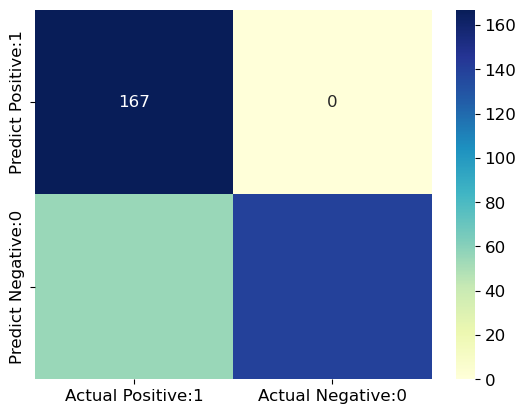

In [86]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
     

In [87]:
# Generate a classification report by comparing the true labels (y_test) with the predicted labels (y_pred)
report = classification_report(y_test, y_pred)

print(report)  # Print the classification report
     

              precision    recall  f1-score   support

       False       0.75      1.00      0.86       167
        True       1.00      0.72      0.83       194

    accuracy                           0.85       361
   macro avg       0.88      0.86      0.85       361
weighted avg       0.89      0.85      0.85       361



In [88]:
TP = cm[0, 0]  # Assign the value at the top-left position of the confusion matrix to TP
TN = cm[1, 1]  # Assign the value at the bottom-right position of the confusion matrix to TN
FP = cm[0, 1]  # Assign the value in the first row and second column of the confusion matrix to FP
FN = cm[1, 0]  # Assign the value in the second row and first column of the confusion matrix to FN

In [89]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8476


In [90]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1524


In [91]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [92]:
# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7523


In [93]:
# print true_positive_rate score

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
     

True Positive Rate : 0.7523


In [94]:
# print false_positive_rate score

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
     

False Positive Rate : 0.0000


In [95]:
# print specificity score

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


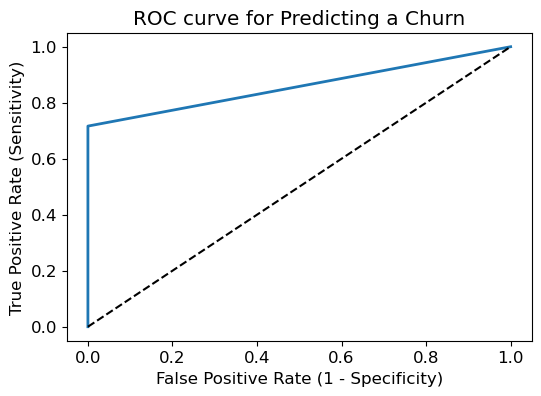

In [96]:
# plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Churn')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
     

In [97]:
# compute ROC AUC

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8582
